In [1]:
import numpy as np
import random

In [2]:
def create_starting_population(individuals, chromosome_length):
    # Set up an initial array of all zeros
    population = np.zeros((individuals, chromosome_length))
    # Loop through each row (individual)
    for i in range(individuals):
        # Choose a random number of ones to create
        ones = random.randint(0, chromosome_length)
        # Change the required number of zeros to ones
        population[i, 0:ones] = 1
        # Shuffle row
        np.random.shuffle(population[i])
    
    return population

In [3]:
def calculate_fitness(population):
    # Create an array of True/False compared to reference
    #identical_to_reference = population == reference
    # Sum number of genes that are identical to the reference
    fitness_scores = [np.sum(p) for p in population]
    
    return fitness_scores

# def calculate_fitness_individual(population):
#     # Create an array of True/False compared to reference
#     #identical_to_reference = population == reference
#     # Sum number of genes that are identical to the reference
#     fitness_scores_individual = np.sum(population)

#     return fitness_scores_individual

In [4]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return the chromsome of the winner
    return population[winner, :]

In [5]:
def breed_by_crossover(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)
    
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    # Return children
    return child_1, child_2

def randomly_mutate_population(population, mutation_probability):
    
    # Apply random mutation
    random_mutation_array = np.random.random(
        size=(population.shape))

    random_mutation_boolean = \
        random_mutation_array <= mutation_probability

    population[random_mutation_boolean] = \
    np.logical_not(population[random_mutation_boolean])

    # Return mutation population
    return population

In [6]:
# Set general parameters
chromosome_length = 100
population_size = 20
maximum_generation = 200
best_score_progress = [] # Tracks progress

In [7]:
# Create starting population
population = create_starting_population(population_size, chromosome_length)

In [8]:
population.shape

(20, 100)

In [9]:
# Display best score in starting population
scores = calculate_fitness(population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, % target: ',best_score)

Starting best score, % target:  91.0


In [14]:
# Add starting best score to progress tracker
best_score_progress.append(best_score)

In [11]:
# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Apply mutation
    mutation_rate = 0.002
    population = randomly_mutate_population(population, mutation_rate)

    # Score best solution, and add to tracker
    scores = calculate_fitness(population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)

# GA has completed required generation
print ('End best score, percent target: %.1f' %best_score)

End best score, percent target: 100.0


In [12]:
population[3]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

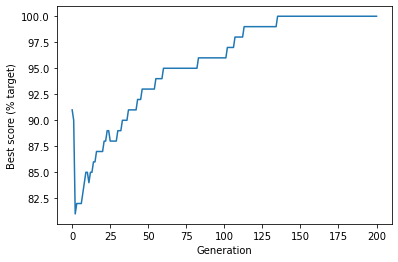

In [13]:
# Plot progress
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()